In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [9]:
def load_data(vector_file):
    # Load words and vectors:
    LATENT_DIM = 256
    mapping = []
    X = []
    with(open(vector_file, 'r')) as file:
        lines = file.readlines()
        counter = 0
        for line in lines:
            data = line.split(' ')
            X.append([float(i) for i in data[1:LATENT_DIM+1]])
            mapping.append((data[0], counter))
            counter += 1
    return X, mapping

In [10]:
def plot_3d(X, mapping, from_, to_):
    X = np.array(X)
    y = np.array([i for i in range(len(mapping))])
    fig = plt.figure(1, figsize=(18, 18))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)
    
    X = X[from_:to_]
    y = y[from_:to_]
    mapping = mapping[from_:to_]   

    for name, label in mapping:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 0.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    #y = np.choose(y, [i for i in range(len(mapping))]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
               edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()

In [11]:
# Word based state. Paper
X, mapping = load_data('C:/Users/Nicolas/Desktop/hidden_states/hidden_states_WordBasedSeq2Seq1000Units20EpochsGLOVE.txt')

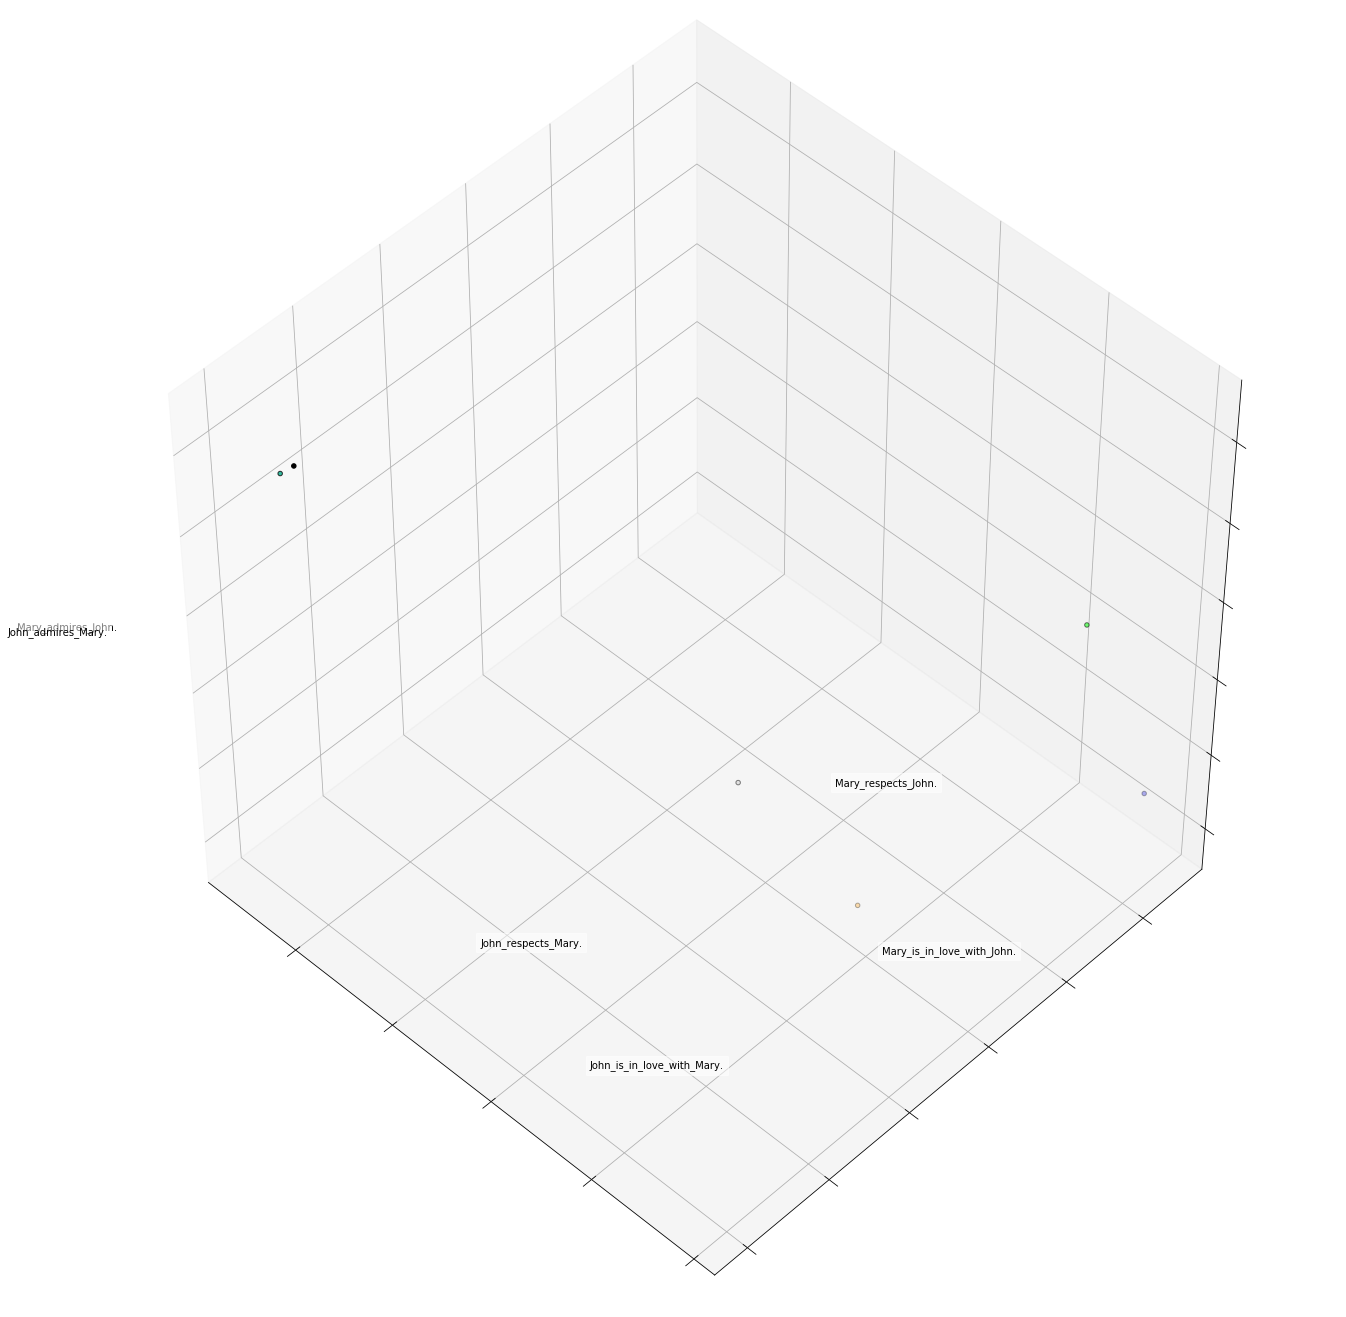

In [12]:
plot_3d(X, mapping, 6, 12)

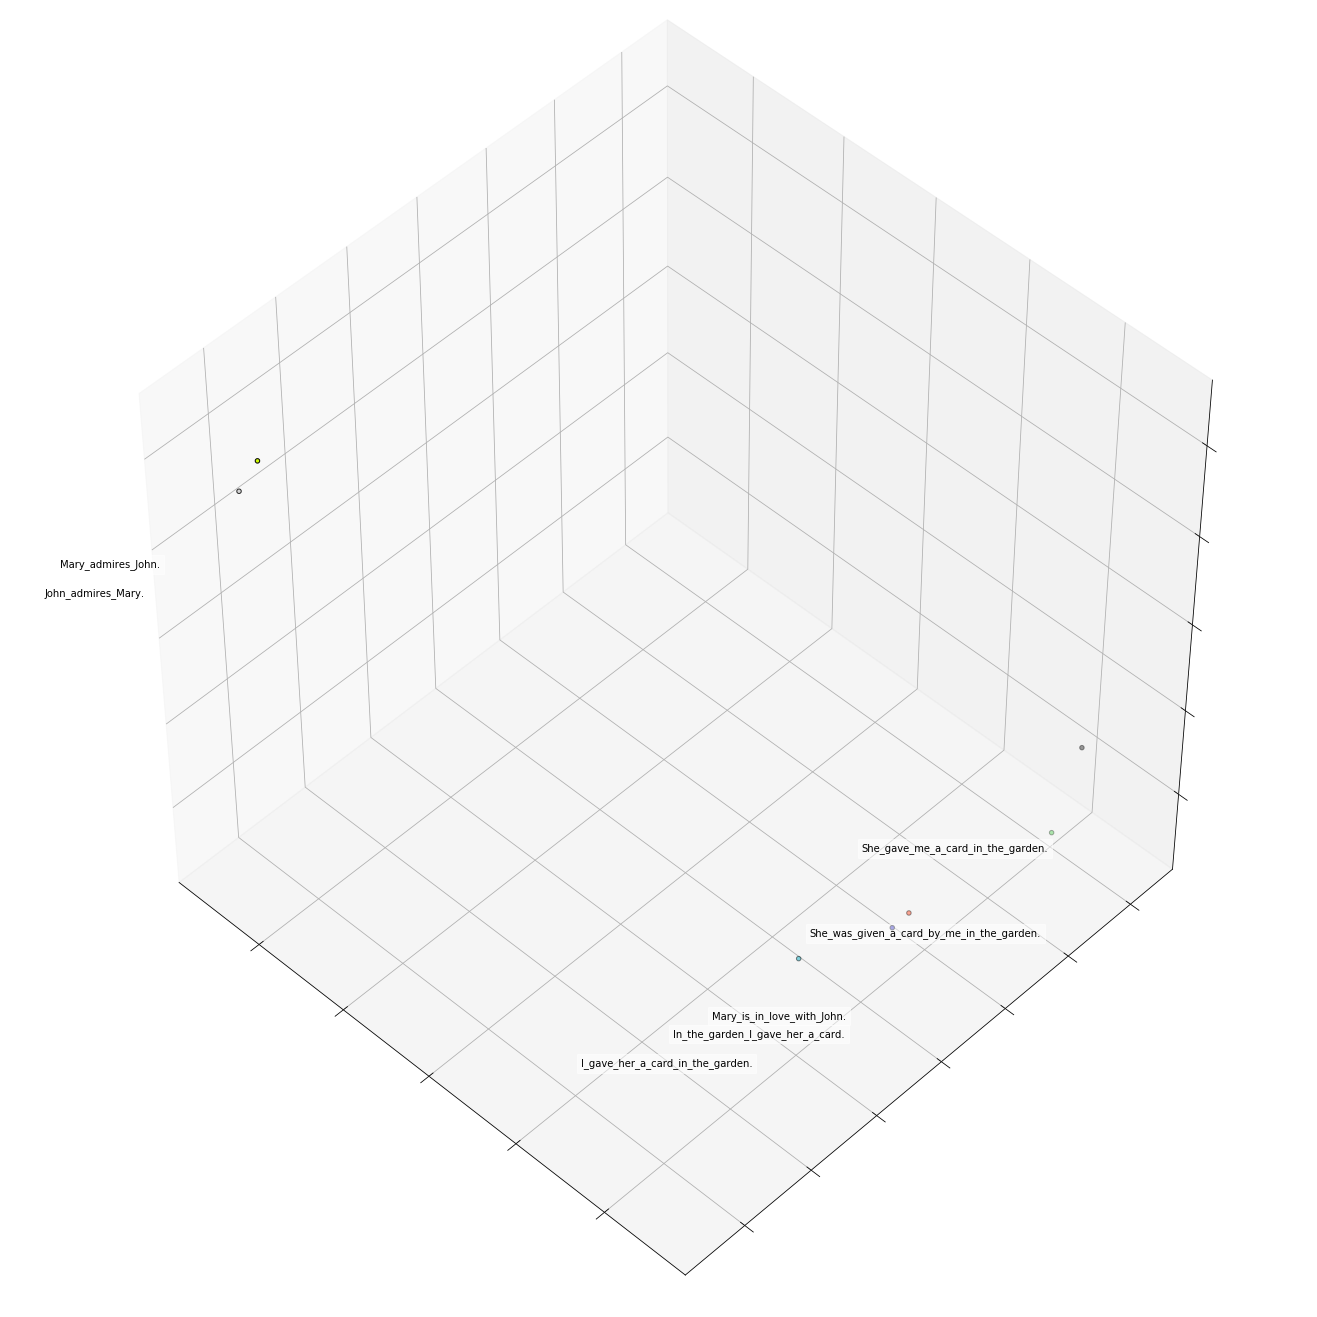

In [13]:
plot_3d(X, mapping, 2, 9)

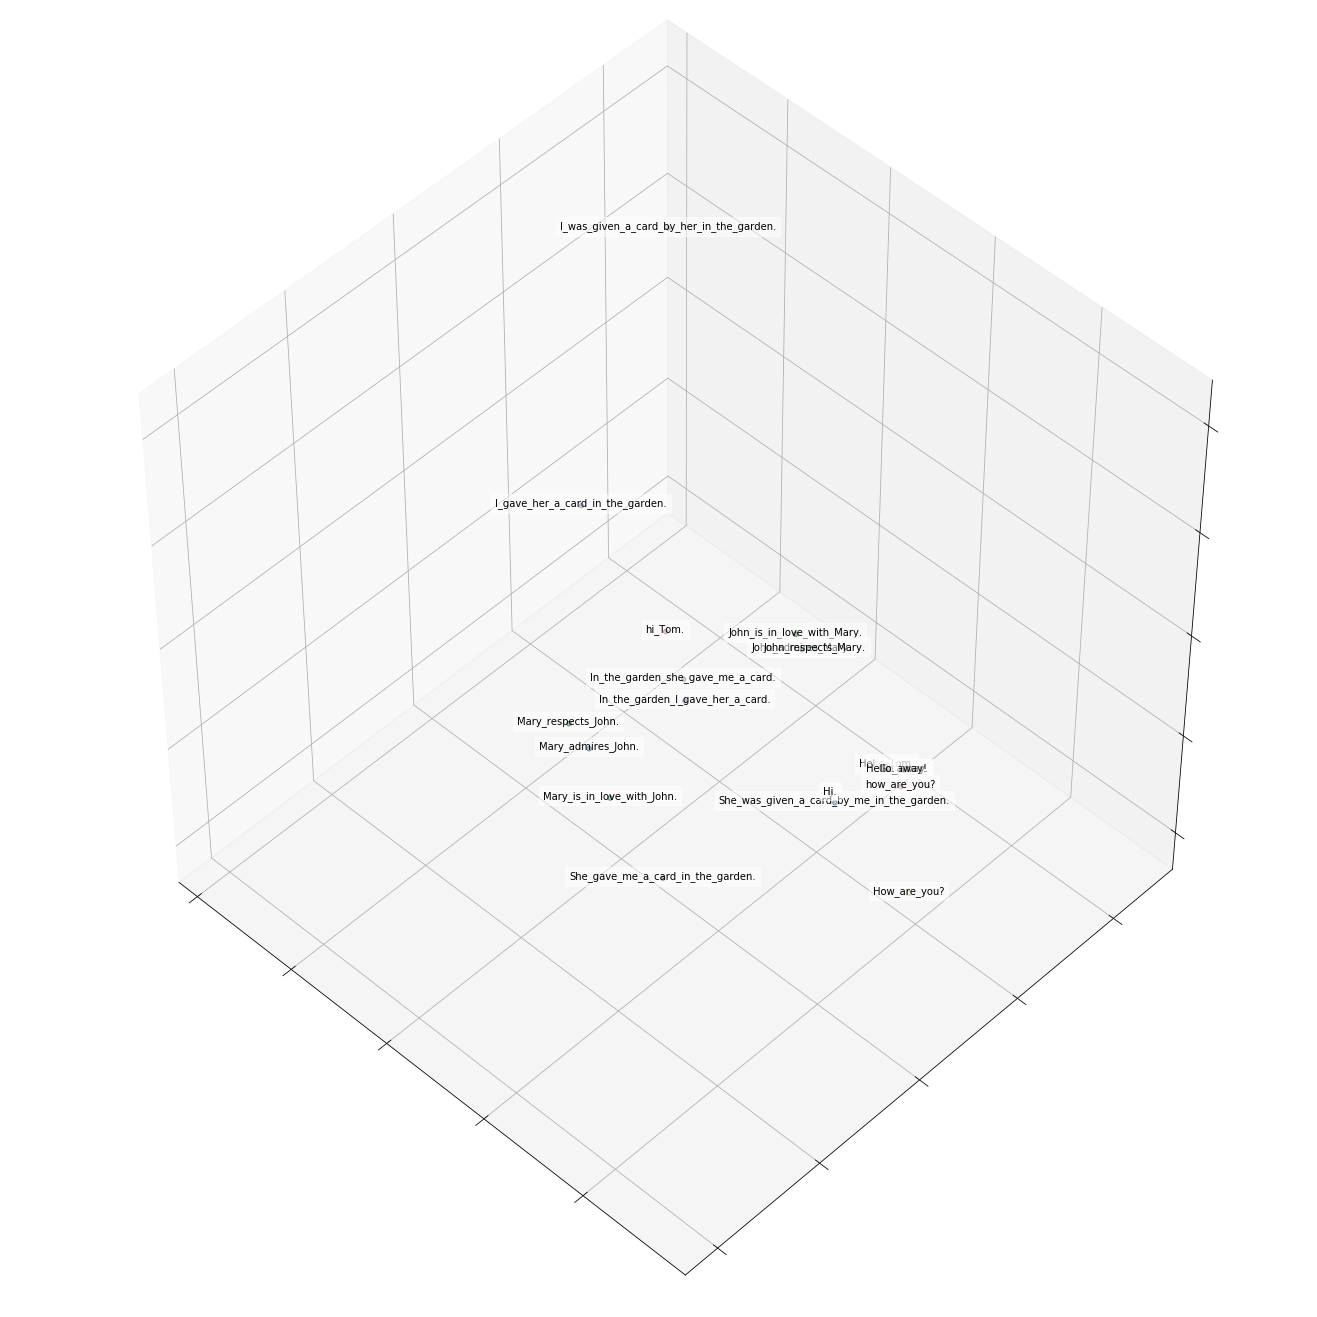

In [19]:
# Word based state. Paper
X, mapping = load_data('C:/Users/Nicolas/Desktop/hidden_states_suf.txt')
plot_3d(X, mapping, 0, 20)